Tutorial used for this project: https://www.youtube.com/watch?v=QIUxPv5PJOY

In [ ]:
!pip install yfinance
!pip install tensorflow==2.0.0
!pip install keras
# Import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

#packages that were not added 
import math
from sklearn.preprocessing import MinMaxScaler
 
#more packages that were not added
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime
from datetime import date 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
#get today's date
today = date.today()

#get stock information
symbol = "APT"
stock = yf.Ticker(symbol)
df = stock.history(interval='1d', start='2020-10-01', end=today)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-10-01 00:00:00-04:00,14.890000,15.35,14.780000,15.270000,671700,0.0,0.0
2020-10-02 00:00:00-04:00,16.500000,16.73,15.620000,16.030001,2575100,0.0,0.0
2020-10-05 00:00:00-04:00,16.030001,17.08,16.030001,16.389999,1417900,0.0,0.0
2020-10-06 00:00:00-04:00,16.850000,16.90,15.400000,15.490000,898500,0.0,0.0
2020-10-07 00:00:00-04:00,15.850000,15.99,15.460000,15.820000,710800,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-03 00:00:00-05:00,4.000000,4.06,3.950000,4.000000,124500,0.0,0.0
2023-01-04 00:00:00-05:00,4.030000,4.11,4.020000,4.050000,46500,0.0,0.0
2023-01-05 00:00:00-05:00,4.080000,4.15,4.040000,4.110000,34900,0.0,0.0


<function matplotlib.pyplot.show(*args, **kw)>

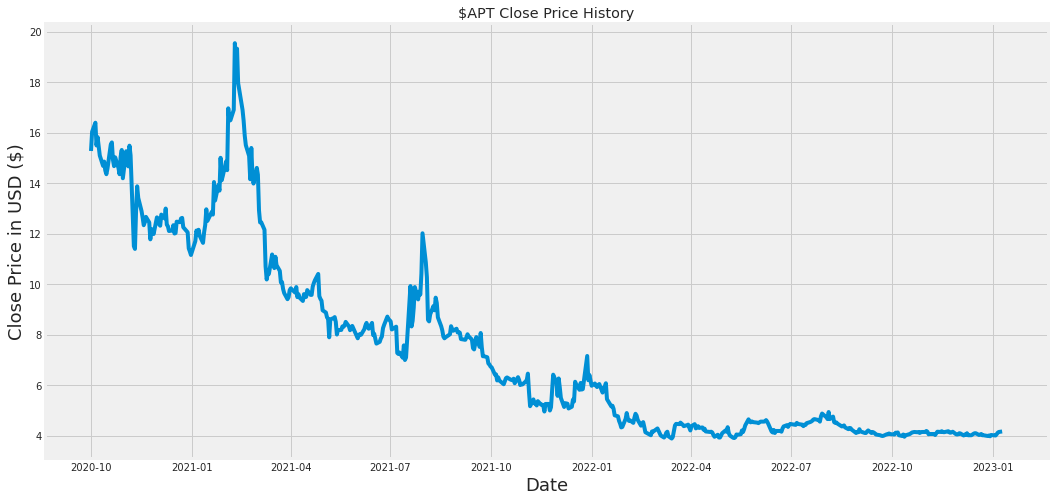

In [ ]:
#visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title("$" + symbol + " Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price in USD ($)", fontsize=18)
plt.show

In [ ]:
#Create new dataframe with only the close column
data = df.filter(["Close"])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len
#len(data.values)

458

In [ ]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_data = scaler.fit_transform(dataset) #compute for scaling from 0-1

scaled_data

array([[0.72733076],
       [0.77586207],
       [0.79885049],
       [0.74137925],
       [0.76245204],
       [0.74010214],
       [0.71583649],
       [0.68965515],
       [0.70051084],
       [0.67816088],
       [0.66858236],
       [0.68263085],
       [0.743295  ],
       [0.74904208],
       [0.7049808 ],
       [0.68901657],
       [0.71136652],
       [0.6845466 ],
       [0.66858236],
       [0.71328222],
       [0.72988504],
       [0.65836519],
       [0.72669218],
       [0.7049808 ],
       [0.68837798],
       [0.74074067],
       [0.71647508],
       [0.48659001],
       [0.47956576],
       [0.5753512 ],
       [0.63793099],
       [0.60855678],
       [0.5753512 ],
       [0.55874837],
       [0.53959128],
       [0.5472541 ],
       [0.56066407],
       [0.54661552],
       [0.50383141],
       [0.53001276],
       [0.51724132],
       [0.55938696],
       [0.55683268],
       [0.54214555],
       [0.53831417],
       [0.5664112 ],
       [0.55683268],
       [0.581

In [ ]:
#Create training dataset
#Create the scaled training dataset
train_data=scaled_data[0:training_data_len, :]

#split the data into x_train and y_train data sets
x_train = [] #independent training features
y_train = [] #target variables 

for i in range(60, len(train_data)):     #question: what does the 60 do? No output when training_data_len = 54 
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print(" ")

[array([0.72733076, 0.77586207, 0.79885049, 0.74137925, 0.76245204,
       0.74010214, 0.71583649, 0.68965515, 0.70051084, 0.67816088,
       0.66858236, 0.68263085, 0.743295  , 0.74904208, 0.7049808 ,
       0.68901657, 0.71136652, 0.6845466 , 0.66858236, 0.71328222,
       0.72988504, 0.65836519, 0.72669218, 0.7049808 , 0.68837798,
       0.74074067, 0.71647508, 0.48659001, 0.47956576, 0.5753512 ,
       0.63793099, 0.60855678, 0.5753512 , 0.55874837, 0.53959128,
       0.5472541 , 0.56066407, 0.54661552, 0.50383141, 0.53001276,
       0.51724132, 0.55938696, 0.55683268, 0.54214555, 0.53831417,
       0.5664112 , 0.55683268, 0.58173686, 0.54086844, 0.537037  ,
       0.5249042 , 0.52618131, 0.53959128, 0.51851848, 0.51979565,
       0.54853127, 0.5472541 , 0.55683268, 0.55810979, 0.53448272])]
[0.5217113447227375]
 
[array([0.72733076, 0.77586207, 0.79885049, 0.74137925, 0.76245204,
       0.74010214, 0.71583649, 0.68965515, 0.70051084, 0.67816088,
       0.66858236, 0.68263085, 0.74

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(398, 60, 1)

In [ ]:
#video timestamp 21:36
#https://www.youtube.com/watch?v=QIUxPv5PJOY

In [ ]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

398/398 [==============================] - 14s 27ms/step - loss: 0.0060


In [ ]:
#Create testing dataset
#Create a new array containing scaled values from index 397 to 571
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [ ]:
#Convert the data to a numpy array
x_test = np.asarray(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

4/4 [==============================] - 1s 16ms/step


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( predictions - y_test)**2)
rmse 

0.8167284455215722

<ipython-input-19-8c657e7a7c96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


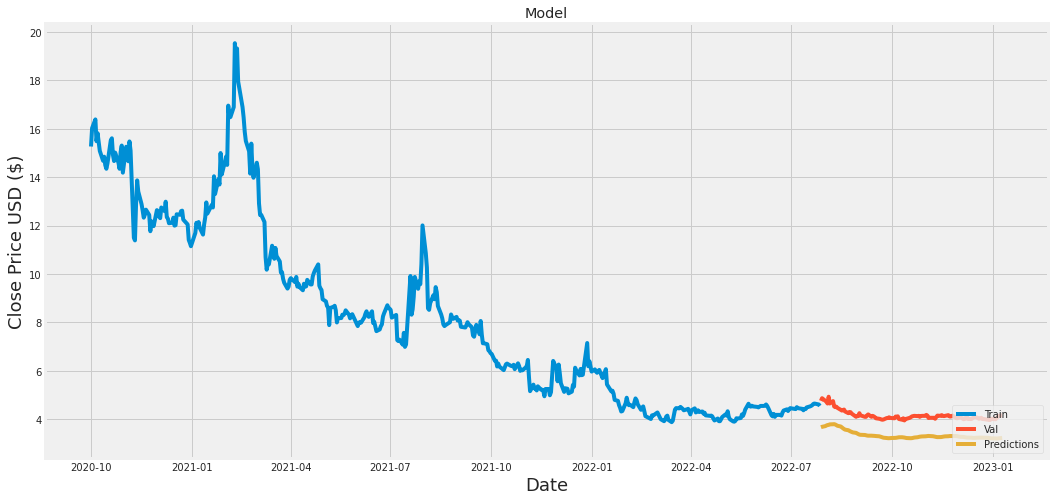

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Worked till video timestamp 40:30
#https://youtu.be/QIUxPv5PJOY?t=2430

In [ ]:
#Show the valid and predicted prices 
valid

,Close,Predictions
Date,,
2022-07-28 00:00:00-04:00,4.76,3.669751
2022-07-29 00:00:00-04:00,4.87,3.686496
2022-08-01 00:00:00-04:00,4.76,3.716220
2022-08-02 00:00:00-04:00,4.72,3.741997
2022-08-03 00:00:00-04:00,4.65,3.759978
...,...,...
2023-01-03 00:00:00-05:00,4.00,3.206015
2023-01-04 00:00:00-05:00,4.05,3.202890
2023-01-05 00:00:00-05:00,4.11,3.204427


In [ ]:
#Get the predicted quote

#get today's date
#today = date.today()

#get stock information
symbol2 = "AAPL"
stock2 = yf.Ticker(symbol2)
df2 = stock2.history(interval='1d', start='2012-01-01', end='2019-12-17')

#Create new dataframe with only the close column
new_df = df2.filter(["Close"])

#get the last 60 day closing price and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#create empty list 
X_test = []

#Append the past 60 days

X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array 
X_test = np.array(X_test)

#Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)

#print prediction
print(pred_price)

1/1 [==============================] - 0s 26ms/step
[[44.264595]]


In [ ]:
#Get the actual quote
symbol3 = "AAPL"
stock3 = yf.Ticker(symbol3)
df3 = stock2.history(interval='1d', start='2019-12-18', end='2019-12-19')
print(df3["Close"].values)

[68.51374817]
